## Detect SVs in single chromosome, in cooler file

You need to specify the path to the cooler file in .mcool format ([how to convert .cool to .mcool](https://cooler.readthedocs.io/en/latest/api.html#cooler.zoomify_cooler)), specify resolution and chromosome name. Also, you could provide the name of device on which you prefer to perform calculations (CPU or GPU).

In [6]:
import cooler
import tensorflow as tf

c = cooler.Cooler('data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/10000')
print(f'List of available chromosomes:{c.chromnames}')
print(f'List of available devices:\n{tf.config.list_logical_devices("CPU")}\n{tf.config.list_logical_devices("GPU")}')

List of available chromosomes:['X', '2R', '2L', '3R', '3L']
List of available devices:
[LogicalDevice(name='/device:CPU:0', device_type='CPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [5]:
from hict_patterns import predict_cooler_single_chromosome

detections_list_2L = predict_cooler_single_chromosome(cooler_file_path="data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool",
                                 resolution=10000,
                                 chromname="2L",
                                 device_name='/device:GPU:0')

Function returns list of coordinates of detected SVs, which could be visualised this way:

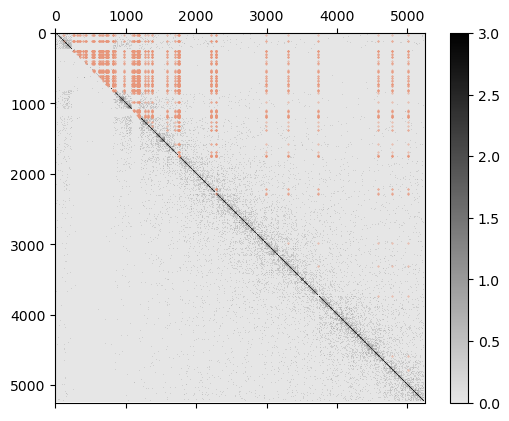

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np

c = cooler.Cooler('data/ARAb_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/10000')
matrix = c.matrix(balance=False).fetch('2L')

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1), cmap=clr.LinearSegmentedColormap.from_list('yarg', ['#e6e6e6','#000'], N=256))
fig.colorbar(im)

plt.scatter([i[0]//10000 for i in detections_list_2L],[i[1]//10000 for i in detections_list_2L],s=0.1, c='#E9967A')

## Detect SVs in all chromosomes, only interchromosomal rearrangements, in cooler file
This function works same way as *predict_cooler_single_chromosome*, but applies it to every chromosome in file

In [1]:
from hict_patterns import predict_cooler

detections_list = predict_cooler(cooler_file_path="data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool",
                                 resolution=10000,
                                 interchromosome=True,
                                 device_name='/device:GPU:0')

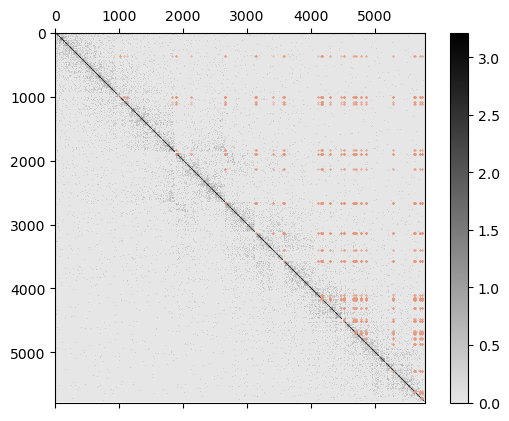

In [6]:
c = cooler.Cooler('data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/10000')
matrix = c.matrix(balance=False).fetch('2R')

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1), cmap=clr.LinearSegmentedColormap.from_list('yarg', ['#e6e6e6','#000'], N=256))
fig.colorbar(im)

detections = detections_list['2R']
plt.scatter([i[0]//10000 for i in detections],[i[1]//10000 for i in detections],s=0.1, c='#E9967A')

## Detect SVs in all chromosomes, inter- and intrachromosomal rearrangements, in cooler file
To detect all kinds of rearrangements specify *interchromosome=False*. This method of searching for rearrangements will take the longest amount of time due to the large amount of data that needs to be inspected.

In [7]:
detections_list = predict_cooler(cooler_file_path="data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool",
                                 resolution=10000,
                                 interchromosome=False,
                                 device_name='/device:GPU:0')

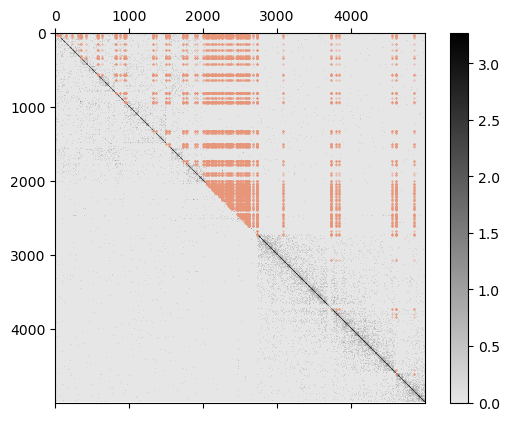

In [13]:
c = cooler.Cooler('data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/10000')
matrix = c.matrix(balance=False)[0:5000, 0:5000]

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1), cmap=clr.LinearSegmentedColormap.from_list('yarg', ['#e6e6e6','#000'], N=256))
fig.colorbar(im)

detections = [(x,y) for x,y in detections_list if x//10000 < 5000 and y//10000<5000]
plt.scatter([i[0]//10000 for i in detections],[i[1]//10000 for i in detections],s=0.1, c='#E9967A')